다음과 같은 시스템을 고려해 보자.

$$x_{k+1}=0.7x_{k}+0.3u_{k}+w_k$$

$$y_{k}=0.6x_{k}+v_k$$

where,

$$w_k\sim N(0,0.01)$$

$$v_k\sim N(0,0.005)$$

$$x_0=0$$

$$u_k=sin(2*\pi*k/100)$$

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
from scipy.stats import norm

In [188]:
F = 0.7 ; B = 0.3; Q = 0.1;
H = 0.6; R = 0.05; x0 = 0;

In [198]:
N=1000; # 데이터 개수
k = np.arange(0,N);
u = np.sin(2*np.pi*k/200);

In [199]:
x = np.zeros(N); x_wn = np.zeros(N);
y = np.zeros(N); y_wn = np.zeros(N); y_wn1 = np.zeros(N); 
w = norm.rvs(loc=0,scale=Q,size=N);
v = norm.rvs(loc=0,scale=R,size=N);
for k in range(N-1):
    x[k+1] = F*x[k]+B*u[k+1];
    x_wn[k+1] = F*x[k]+B*u[k+1] + w[k];
for k in range(N):
    y[k] = H*x[k];
    y_wn[k] = H*x[k] + v[k]; 
    y_wn1[k] = H*x_wn[k] + v[k]; 

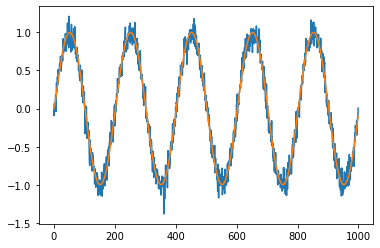

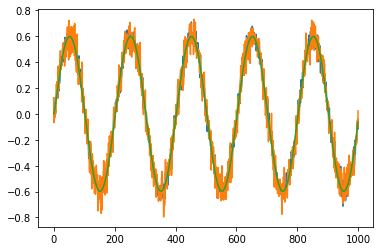

In [200]:
plt.figure(); plt.plot(x_wn); plt.plot(x);
plt.figure(); plt.plot(y_wn); plt.plot(y_wn1); plt.plot(y);

칼만필터를 수행해 보자.

In [201]:
# 칼만필터 Object 생성
# x=state / z=measurement / u=input
kf = KalmanFilter (dim_x=1, dim_z=1, dim_u=1)

In [256]:
kf.x = np.array([[x0]]); # initial state
kf.F = np.array([[F]]);  kf.B = np.array([[B]]); kf.Q = np.array([[Q]]);
kf.H = np.array([[H]]);  kf.R = np.array([[R]])*1e-4; kf.P = np.array([[1000]]);

In [259]:
x_es = np.zeros(N);
for k in range(N):
    kf.predict();
    kf.update(y_wn1[k].reshape(1,1));
    x_es[k] = kf.x[0,0];

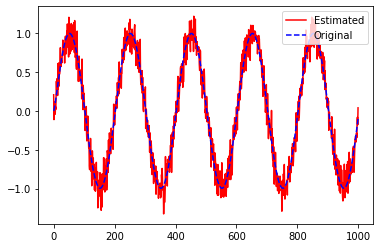

In [260]:
plt.plot(x_es,'r-'); plt.plot(x,'b--');
plt.legend(['Estimated','Original'],loc='upper right');